In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Unzip and extract
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/BuMa.zip', 'r')
zip_ref.extractall('/content/dataset_cek')
zip_ref.close()

# **Directori**

In [ ]:
train_dir = os.path.join('/content/dataset_cek/train')
validation_dir=os.path.join('/content/dataset_cek/validation')

# **MODEL**

In [ ]:
# Augmentasi
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')


validation_datagen = ImageDataGenerator(rescale=1./255, 
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True)


In [ ]:
train_generator = train_datagen.flow_from_directory('/content/dataset_cek/train',
                                                      target_size=(150,150),
  	                                                  class_mode='categorical',
                                                      batch_size=20)


validation_generator = validation_datagen.flow_from_directory('/content/dataset_cek/validation',
                                                                target_size=(150,150),
	                                                              class_mode='categorical',
                                                                batch_size=20)

Found 500 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [ ]:
# Train  model
history = model.fit(train_generator, 
                    epochs=25, 
                    steps_per_epoch=20, 
                    validation_data = validation_generator, 
                    verbose = 1, 
                    validation_steps=3)

Epoch 1/25
20/20 [==============================] - 50s 2s/step - loss: 4.9123 - accuracy: 0.3275 - val_loss: 1.1087 - val_accuracy: 0.3833
Epoch 2/25
20/20 [==============================] - 44s 2s/step - loss: 1.2636 - accuracy: 0.4350 - val_loss: 1.3046 - val_accuracy: 0.5000
Epoch 3/25
20/20 [==============================] - 44s 2s/step - loss: 1.0463 - accuracy: 0.5575 - val_loss: 3.1116 - val_accuracy: 0.3833
Epoch 4/25
20/20 [==============================] - 45s 2s/step - loss: 0.9487 - accuracy: 0.6500 - val_loss: 0.8328 - val_accuracy: 0.7500
Epoch 5/25
20/20 [==============================] - 46s 2s/step - loss: 0.7648 - accuracy: 0.7000 - val_loss: 0.5941 - val_accuracy: 0.7000
Epoch 6/25
20/20 [==============================] - 44s 2s/step - loss: 0.6854 - accuracy: 0.7425 - val_loss: 1.5357 - val_accuracy: 0.5167
Epoch 7/25
20/20 [==============================] - 46s 2s/step - loss: 0.7612 - accuracy: 0.7375 - val_loss: 0.9190 - val_accuracy: 0.5833
Epoch 8/25
20/20 [==

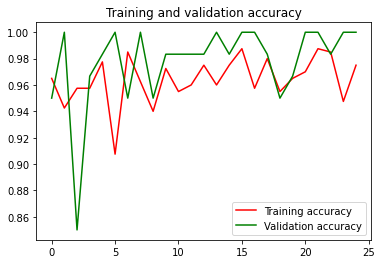

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']     
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
export_dir = '/tmp/saved_model'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: /tmp/saved_model/assets


In [ ]:
# Convert model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [ ]:
# Save the model
tflite_model_file = pathlib.Path('/tmp/buma4.tflite')
tflite_model_file.write_bytes(tflite_model)

76668484